### **1. Import Required Libraries**

In [31]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress MKL and Convergence warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### **2. Load the Dataset**

In [33]:
# Load the dataset
file_path = 'pubg_dataset- Sheet.csv'  # Replace with the appropriate file if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Groupid,Id,Matchid,Matchtype,Assists,Boosts,Damagedealt,Headshotkills,Heals,Is Duo,...,Swimdistance,Teamkills,Vehicledestroys,Walkdistance,Weaponsacquired,Winplaceperc,Ln Damage Dealt,Ln Match Kill Rank,Ln Win Place Perc,Ln Win Place Perc.1
0,32dc8ae9572956,4bda15647cb16c,b262d5270ee227,solo,0,0,53.32,0,0,0,...,0.0,0,0,603.6,3,0.6354,3.976311,3.970292,-0.453501,-0.453501
1,559ec1194e4a7d,bc952a1b1e62d7,4b8d740dda9ca9,squad,1,3,427.5,0,1,0,...,0.0,0,0,2716.0,6,0.9615,6.057954,2.397895,-0.039261,-0.039261
2,7d4155b927c232,eb1cc8c533c91f,a3cb2f821cebee,duo,0,3,393.1,1,5,1,...,0.0,0,0,2107.0,3,0.8511,5.974064,2.484907,-0.161226,-0.161226
3,8e4fcc73aa9046,3d621777a0b77f,9e9a7fc4f76c37,squad,0,0,142.9,1,0,0,...,0.0,0,0,161.3,2,0.0769,4.962145,3.218876,-2.565249,-2.565249
4,7f802b015bf341,5ab218d8cd339f,760c1a85499e78,duo,0,0,61.64,0,3,1,...,0.0,1,0,455.8,4,0.3125,4.121311,3.332205,-1.163151,-1.163151


### **3. Handle Missing Values**

In [35]:
# Check for missing values
print("Missing values in each feature:")
print(data.isnull().sum())

# Drop rows with missing values (or optionally impute)
data_cleaned = data.dropna()
print(f"Data shape after removing missing values: {data_cleaned.shape}")


Missing values in each feature:
Groupid                0
Id                     0
Matchid                0
Matchtype              0
Assists                0
Boosts                 0
Damagedealt            0
Headshotkills          0
Heals                  0
Is Duo                 0
Is Squad               0
Kills                  0
Killstreaks            0
Longestkill            0
Matchduration          0
Matchkillrank          0
Matchtypeint           0
Maxplace               0
Numenemiesknocked      0
Numgroups              0
Overallkillrank        0
Overallwinbasedrank    0
Revives                0
Ridedistance           0
Swimdistance           0
Teamkills              0
Vehicledestroys        0
Walkdistance           0
Weaponsacquired        0
Winplaceperc           0
Ln Damage Dealt        0
Ln Match Kill Rank     0
Ln Win Place Perc      0
Ln Win Place Perc.1    0
dtype: int64
Data shape after removing missing values: (5000, 34)


### **4. Data Visualisation**

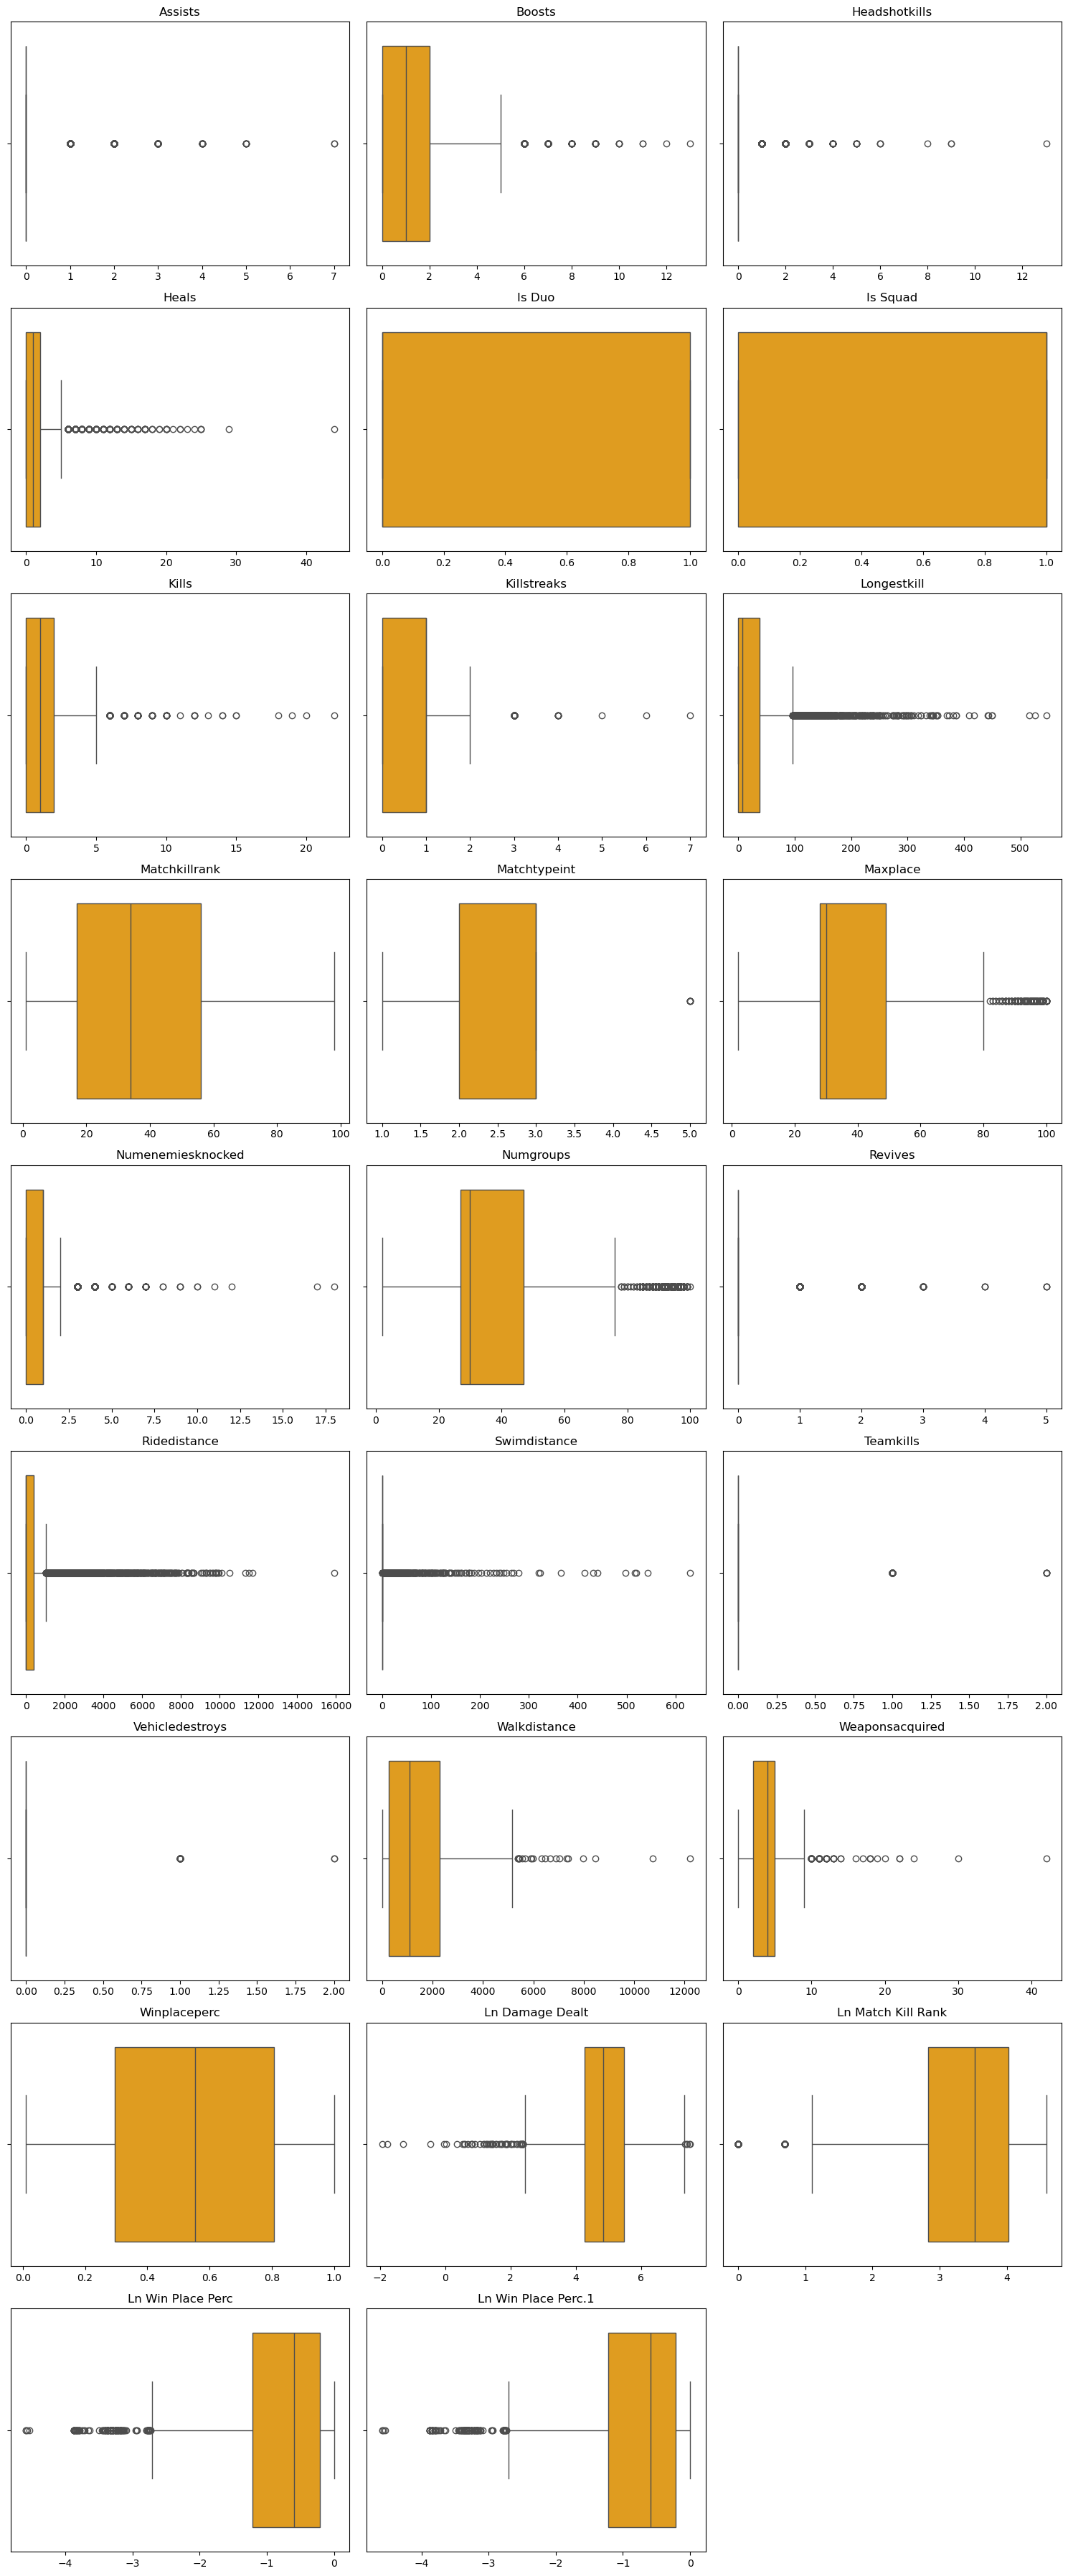

In [39]:
# Visualise outliers by Box Plots
numeric_columns = data.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() 

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i], color="orange")
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel("") 

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.tight_layout()
plt.show()

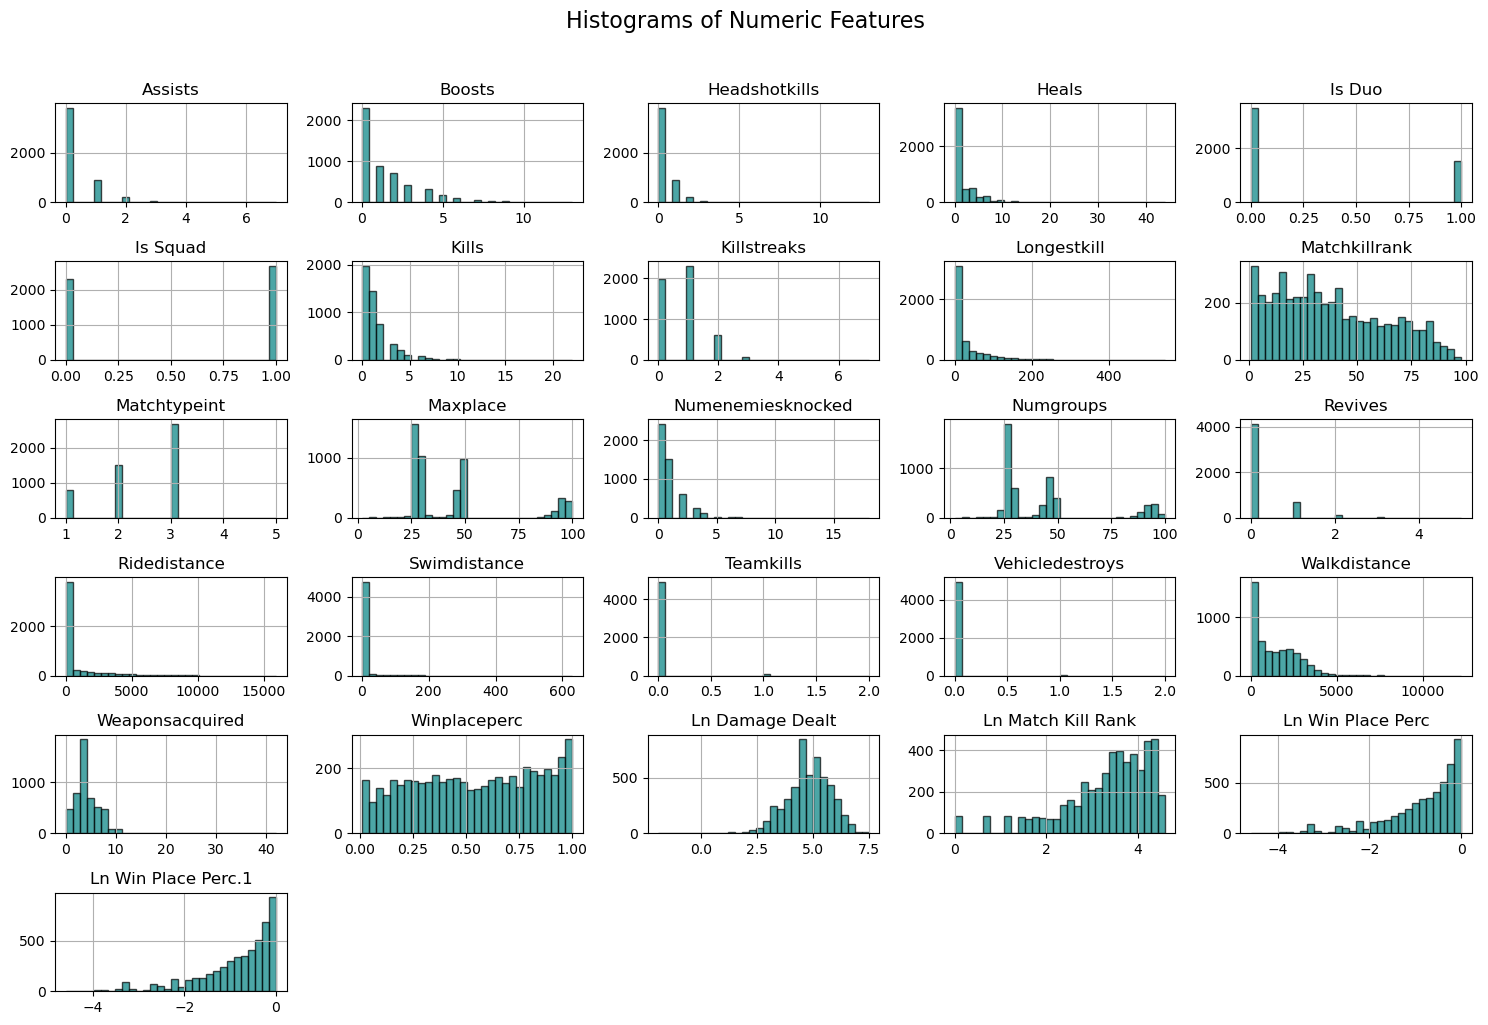

In [41]:
# Creating histograms
data[numeric_columns].hist(
    figsize=(15, 10), bins=30, color='teal', alpha=0.7, edgecolor='black'
)

plt.suptitle("Histograms of Numeric Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### **5. Correlation Analysis**

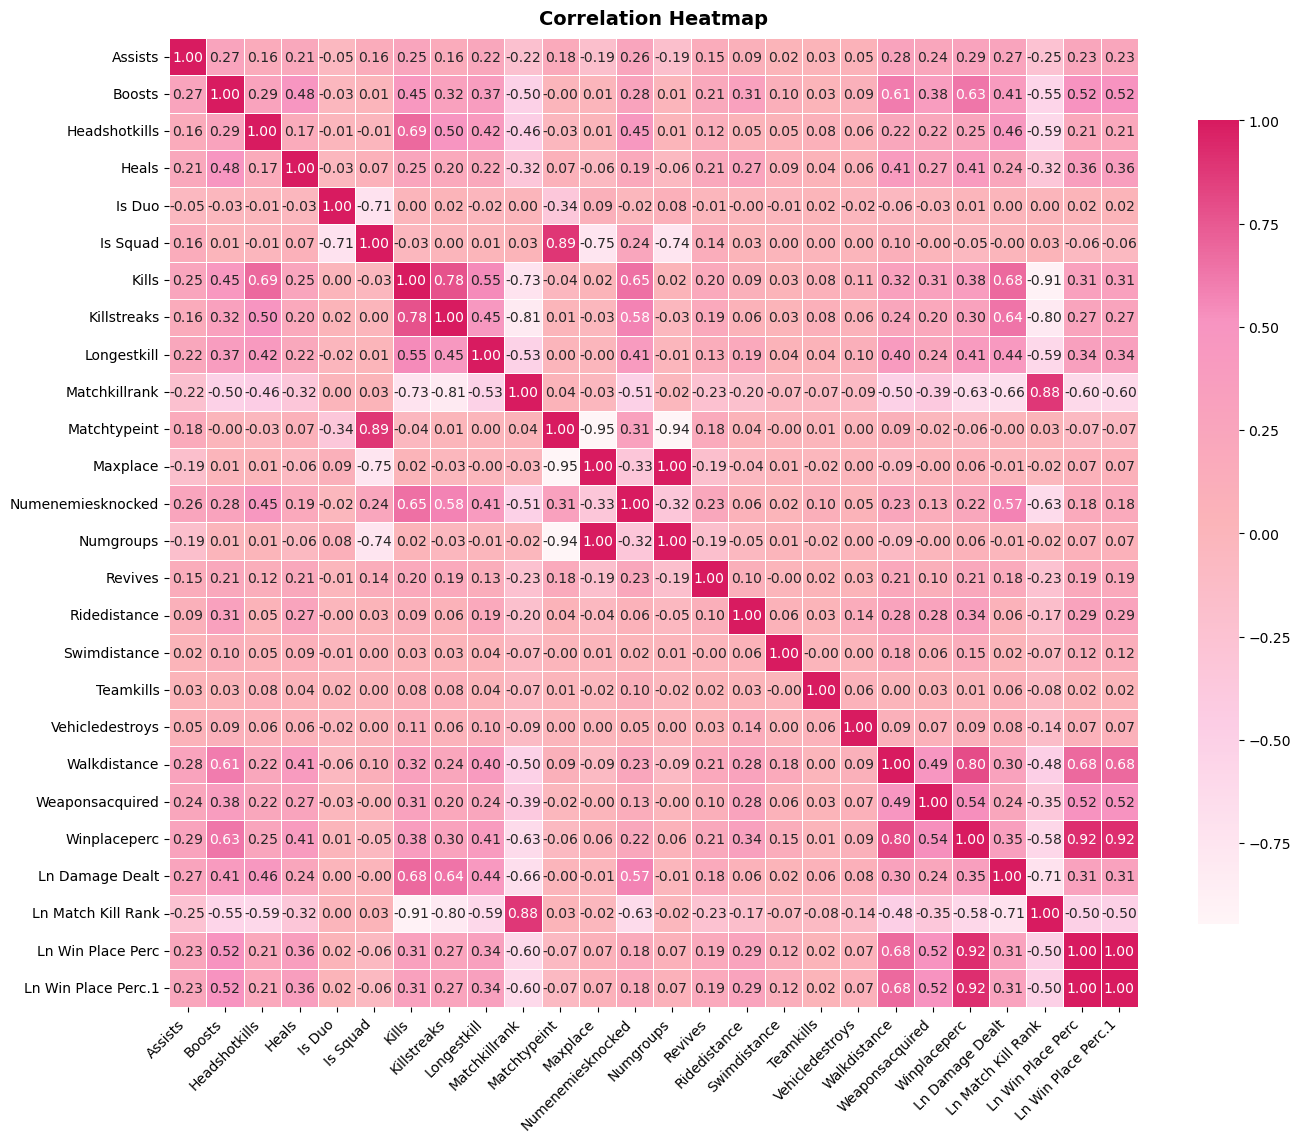

In [43]:

custom_colors = ["#fff5f7", "#fccde5", "#fbb4b9", "#f794c1", "#d81b60"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("PinkLemonade", custom_colors)

# Calculate the correlation matrix
corr = data.corr(numeric_only = True)

# Correlation Matrix representation using Heatmap 
plt.figure(figsize=(14, 12))  
sns.heatmap(
    corr, 
    annot=True,          
    fmt=".2f",        
    cmap=custom_cmap,   
    square=True,       
    cbar_kws={"shrink": 0.75}, 
    linewidths=0.5,
    linecolor='white'
)

plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)

plt.title('Correlation Heatmap', fontsize=14, weight='bold', pad=10)

plt.tight_layout()
plt.show()

### **6. Select Interesting Features**

In [45]:
# Selecting relevant features
selected_features = ['Kills', 'Boosts', 'Walkdistance', 'Weaponsacquired', 'Assists']
data_selected = data[selected_features]

# Checking the shape of the selected data
data_selected.info()

# Drop rows with missing values
data_cleaned = data_selected.dropna()

# Optional: Display the shape of the dataset before and after dropping missing values
print(f"Original data shape: {data_selected.shape}")
print(f"Data shape after dropping missing values: {data_selected.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kills            5000 non-null   int64  
 1   Boosts           5000 non-null   int64  
 2   Walkdistance     5000 non-null   float64
 3   Weaponsacquired  5000 non-null   int64  
 4   Assists          5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB
Original data shape: (5000, 5)
Data shape after dropping missing values: (5000, 5)


### **7. Detect and Remove Outliers**

In [47]:
# First, select only numeric columns from the DataFrame
data_cleaned = data_selected.select_dtypes(include=['number'])

# Then calculate IQR only for these numeric columns
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Now, we can safely calculate the outliers
outliers = ((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)

# And then we can create a new DataFrame excluding these outliers
data_cleaned = data_cleaned[~outliers]

print(f"Data shape after outlier removal: {data_cleaned.shape}")

Data shape after outlier removal: (3569, 5)


### **8. Normalise the Data**

In [55]:
# Select only the features to be scaled
data_selected = data_cleaned[selected_features]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Convert back to a DataFrame for better readability
data_scaled = pd.DataFrame(data_scaled, columns=selected_features)

### **9. Determine Optimal Number of Clusters with Elbow Method**

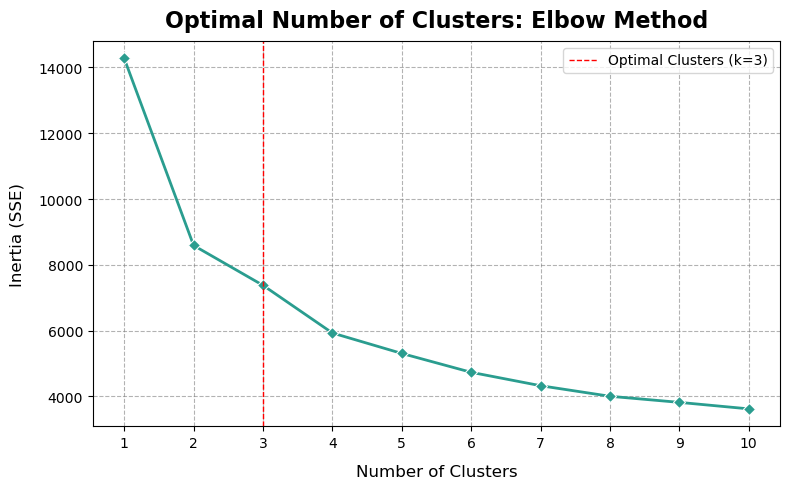

In [58]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(data_scaled)
    inertia.append(kmeans_temp.inertia_)

# Elbow Curve Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_range), y=inertia, marker='D', linestyle='-', color='#2A9D8F', linewidth=2)

plt.title("Optimal Number of Clusters: Elbow Method", fontsize=16, weight='bold', pad=10)
plt.xlabel("Number of Clusters", fontsize=12, labelpad=10)
plt.ylabel("Inertia (SSE)", fontsize=12, labelpad=10)

plt.grid(alpha=0.6, linestyle='--', color='gray')
plt.xticks(k_range, fontsize=10)
plt.yticks(fontsize=10)

plt.axvline(x=3, color='red', linestyle='--', linewidth=1, label='Optimal Clusters (k=3)')
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

### **10. Perform K-Means Clustering**

In [63]:
# Applying K-Means clustering with optimal number of clusters
optimal_clusters = 3  # number determined from the Elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)

# Adding cluster labels to the dataset
pd.options.mode.chained_assignment = None
data_selected['Cluster'] = kmeans.labels_
print(f"Clustering complete. Assigned clusters: {optimal_clusters}")
print(data_selected['Cluster'].value_counts())


Clustering complete. Assigned clusters: 3
Cluster
0    1963
1    1057
2     549
Name: count, dtype: int64


### **11. Visualise Clusters in Original Feature Space**

In [65]:
# Generate synthetic data with 3 centers
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Create a KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit model to data
kmeans.fit(X)

# Get cluster assignments
y_kmeans = kmeans.predict(X)

# Display cluster centers
kmeans.cluster_centers_

array([[ 0.95625704,  4.37226546],
       [-1.60811992,  2.85881658],
       [ 1.95159369,  0.83467497]])

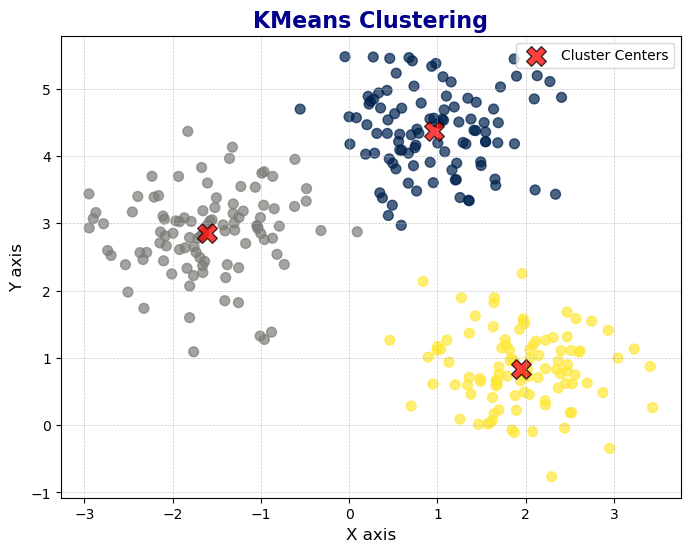

In [67]:
# Plotting the scatter plot of the data points with cluster colors
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cividis', alpha=0.7)

# Highlight the cluster centers with a red 'X'
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', edgecolors='black', label='Cluster Centers')

# Add title and labels for clarity
plt.title('KMeans Clustering', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('X axis', fontsize=12)
plt.ylabel('Y axis', fontsize=12)

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

### **12. Validation of Clusters using Silhouette Scores**

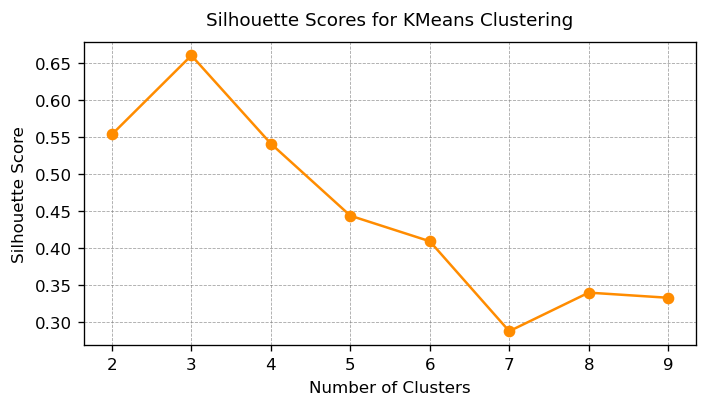

In [69]:
# Evaluate silhouette scores for different numbers of clusters
silhouette_scores = []
k_values = range(2, 10)
for n_clusters in k_values:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(6, 3.5), dpi=120)
plt.plot(k_values, silhouette_scores, marker='o', color='darkorange', linestyle='-', linewidth=1.5, markersize=6)
plt.xticks(k_values)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Number of Clusters', fontsize=10, labelpad=5)
plt.ylabel('Silhouette Score', fontsize=10, labelpad=5)
plt.title('Silhouette Scores for KMeans Clustering', fontsize=11, pad=10)
plt.tight_layout()
plt.show()


### **13. Visualise Clusters with PCA**

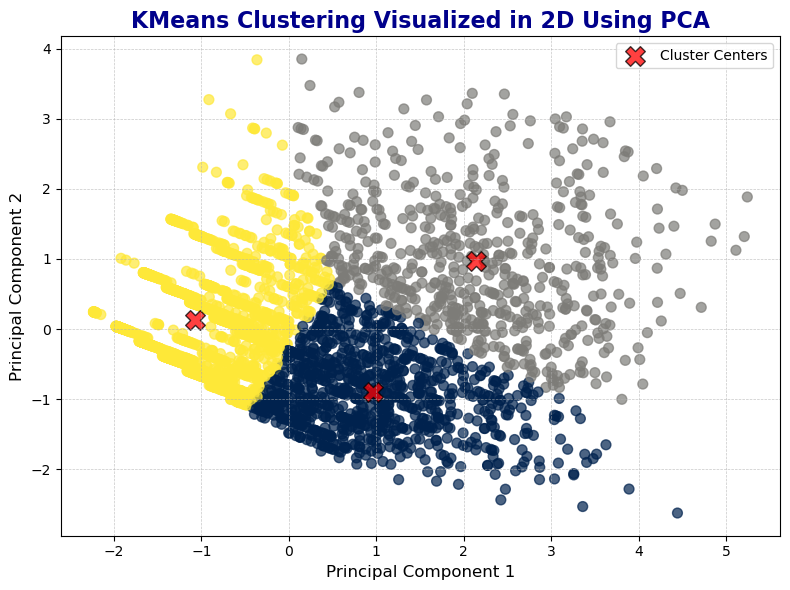

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Apply K-Means clustering in the PCA-reduced space
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_pca.fit(X_pca)

# Add the PCA-based cluster labels to the dataset
data_selected['Cluster_PCA'] = kmeans_pca.labels_

# Plot the data points in 2D using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1], 
    c=data_selected['Cluster_PCA'], cmap='cividis', s=50, alpha=0.7
)

# Compute cluster centers in the PCA-reduced space
cluster_centers_pca = kmeans_pca.cluster_centers_
plt.scatter(
    cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
    c='red', s=200, alpha=0.75, marker='X', edgecolors='black', label='Cluster Centers'
)

plt.title('KMeans Clustering Visualized in 2D Using PCA', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

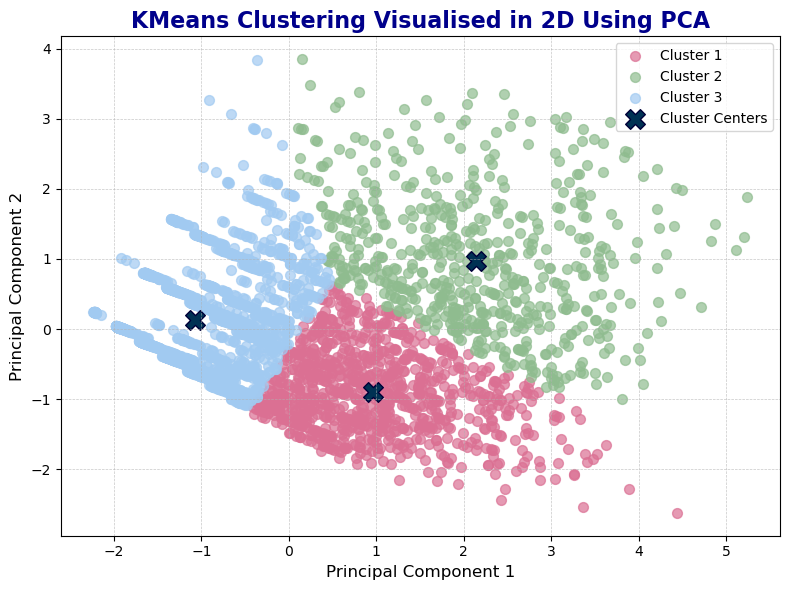

In [83]:
# Custom color palette
palette = ['#db7093', '#8fbc8f', '#a1caf1']

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Apply K-Means clustering in the PCA-reduced space
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_pca.fit(X_pca)

# Add the PCA-based cluster labels to the dataset
data_selected['Cluster_PCA'] = kmeans_pca.labels_

# Plot the clusters in PCA 
plt.figure(figsize=(8, 6))
for cluster_id in range(optimal_clusters):
    cluster_data = X_pca[data_selected['Cluster_PCA'] == cluster_id]
    plt.scatter(
        cluster_data[:, 0], cluster_data[:, 1], 
        c=palette[cluster_id], s=50, alpha=0.7, label=f'Cluster {cluster_id + 1}'
    )

# Compute cluster centers in the PCA-reduced space
cluster_centers_pca = kmeans_pca.cluster_centers_
plt.scatter(
    cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
    c='#003153', s=200, marker='X', edgecolors='#000039', label='Cluster Centers'
)
plt.title('KMeans Clustering Visualised in 2D Using PCA', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()